In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
import matplotlib.pyplot as plt

In [4]:
# ctrl + / = 주석처리

In [10]:
plt.rc('font',family='Malgun Gothic')

In [11]:
#그래프가 노트북 안으로 보이게
%matplotlib inline

In [18]:
df= pd.read_csv("Downloads/소상공인시장진흥공단_상가업소정보_의료기관_201909.csv",encoding="utf8",engine="python")

In [27]:
df.info

<bound method DataFrame.info of          상가업소번호              상호명       지점명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드  \
0      19956873           하나산부인과       NaN         S       의료       S01   
1      20024149         타워광명내과의원       NaN         S       의료       S01   
2      20152277        조정현신경외과의원       NaN         S       의료       S01   
3      20350610         한귀원정신과의원       NaN         S       의료       S01   
4      20364049        더블유스토어수지점       수지점         S       의료       S02   
5      20809147           행신동물병원       NaN         S       의료       S04   
6      20733252            춘산한약방       NaN         S       의료       S02   
7      20582210            부부탕제원       NaN         S       의료       S02   
8      20808534           코원성형외과       NaN         S       의료       S01   
9      20755460         헬로스마일소아과       NaN         S       의료       S01   
10     21057519             민생약국       NaN         S       의료       S02   
11     21233296          킴스통증크리닉       NaN         S       의료       

In [28]:
df.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

In [29]:
df.dtypes

상가업소번호         int64
상호명           object
지점명           object
상권업종대분류코드     object
상권업종대분류명      object
상권업종중분류코드     object
상권업종중분류명      object
상권업종소분류코드     object
상권업종소분류명      object
표준산업분류코드      object
표준산업분류명       object
시도코드         float64
시도명           object
시군구코드        float64
시군구명          object
행정동코드          int64
행정동명          object
법정동코드        float64
법정동명          object
지번코드           int64
대지구분코드         int64
대지구분명         object
지번본번지          int64
지번부번지        float64
지번주소          object
도로명코드          int64
도로명           object
건물본번지          int64
건물부번지        float64
건물관리번호        object
건물명           object
도로명주소         object
구우편번호        float64
신우편번호        float64
동정보           object
층정보           object
호정보           object
경도           float64
위도           float64
dtype: object

In [33]:
null_count = df.isnull().sum()

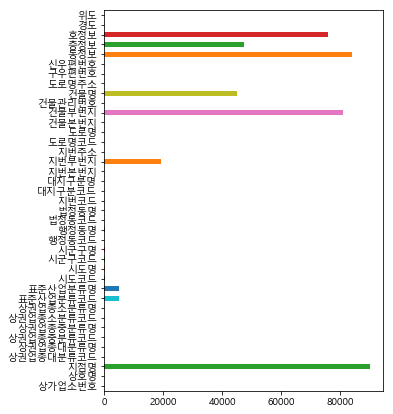

In [38]:
null_count.plot.barh(figsize=(5,7))

In [39]:
# index 넣어서 df 형태로 만들기 --> reset_index()
df_null_count = null_count.reset_index()

In [42]:
df_null_count.columns = ["컬럼명","결측치수"]
df_null_count.head()

,컬럼명,결측치수
0,상가업소번호,0
1,상호명,0
2,지점명,89989
3,상권업종대분류코드,0
4,상권업종대분류명,0


In [51]:
df_null_count_top = df_null_count.sort_values(by="결측치수",ascending=False).head(10)
df_null_count_top

,컬럼명,결측치수
2,지점명,89989
34,동정보,83929
28,건물부번지,80731
36,호정보,75784
35,층정보,47291
30,건물명,44882
23,지번부번지,19256
9,표준산업분류코드,4922
10,표준산업분류명,4922
11,시도코드,379


In [49]:
# NaN = Not a Number
df["지점명"].head()

0    NaN
1    NaN
2    NaN
3    NaN
4    수지점
Name: 지점명, dtype: object

In [50]:
df_null_count["컬럼명"]

0        상가업소번호
1           상호명
2           지점명
3     상권업종대분류코드
4      상권업종대분류명
5     상권업종중분류코드
6      상권업종중분류명
7     상권업종소분류코드
8      상권업종소분류명
9      표준산업분류코드
10      표준산업분류명
11         시도코드
12          시도명
13        시군구코드
14         시군구명
15        행정동코드
16         행정동명
17        법정동코드
18         법정동명
19         지번코드
20       대지구분코드
21        대지구분명
22        지번본번지
23        지번부번지
24         지번주소
25        도로명코드
26          도로명
27        건물본번지
28        건물부번지
29       건물관리번호
30          건물명
31        도로명주소
32        구우편번호
33        신우편번호
34          동정보
35          층정보
36          호정보
37           경도
38           위도
Name: 컬럼명, dtype: object

In [54]:
# tolist() = list형태로 만들기 
drop_columns = df_null_count_top["컬럼명"].tolist()
df[drop_columns].head()

,지점명,동정보,건물부번지,호정보,층정보,건물명,지번부번지,표준산업분류코드,표준산업분류명,시도코드
0,NaN,NaN,NaN,NaN,NaN,산호한양아파트,NaN,Q86201,일반 의원,41.0
1,NaN,NaN,NaN,NaN,4,NaN,14.0,Q86201,일반 의원,11.0
2,NaN,NaN,NaN,NaN,NaN,한라프라자,1.0,Q86201,일반 의원,41.0
3,NaN,NaN,NaN,NaN,5,NaN,1.0,NaN,NaN,26.0
4,수지점,NaN,NaN,NaN,1,NaN,2.0,G47811,의약품 및 의료용품 소매업,41.0


In [55]:
print(df.shape)
# axis = 1은 행 기준
df = df.drop(drop_columns, axis=1)
print(df.shape)

(91335, 39)
(91335, 29)


# 1.11 기초통계값 보기

## 1.11.1 기초통계수치

In [56]:
df["위도"].describe()

count    91335.000000
mean        36.624711
std          1.041361
min         33.219290
25%         35.811830
50%         37.234652
75%         37.507463
max         38.499659
Name: 위도, dtype: float64

In [78]:
df.describe(include="object")

,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,표준산업분류명,...,법정동명,대지구분명,지번주소,도로명,건물관리번호,건물명,도로명주소,동정보,층정보,호정보
count,91335,1346,91335,91335,91335,91335,91335,91335,86413,86413,...,91280,91335,91335,91335,91335,46453,91335,7406,44044,15551
unique,56910,858,1,1,5,5,34,34,15,15,...,2822,2,53118,16610,54142,17946,54031,556,74,849
top,리원,장례식장,S,의료,S01,병원,S02A01,약국,Q86201,일반 의원,...,중동,대지,서울특별시 동대문구 제기동 965-1,서울특별시 강남구 강남대로,1123010300109650001031604,현대아파트,서울특별시 동대문구 약령중앙로8길 10,1,1,1
freq,152,97,91335,91335,60774,60774,18964,18964,22555,22555,...,874,91213,198,326,198,131,198,1571,15994,1286


In [79]:
df["상권업종대분류명"].unique()

array(['의료'], dtype=object)

In [85]:
# unique = 중복없이 컬럼 나열
# nunique / len = 중복없는 컬럼 갯수
print(df["상권업종중분류명"].unique())
print(df["상권업종중분류명"].nunique())


['병원' '약국/한약방' '수의업' '유사의료업' '의료관련서비스업']
5


In [86]:
df["상권업종소분류명"].unique()

array(['산부인과', '내과/외과', '신경외과', '기타병원', '약국', '동물병원', '한약방', '탕제원',
       '정형/성형외과', '소아과', '이비인후과의원', '노인/치매병원', '언어치료', '수의업-종합', '한의원',
       '치과의원', '침구원', '일반병원', '안과의원', '조산원', '한방병원', '종합병원', '유사의료업기타',
       '응급구조대', '혈액원', '치과병원', '척추교정치료', '피부과', '비뇨기과', '치과기공소', '산후조리원',
       '접골원', '수의업-기타', '제대혈'], dtype=object)

In [89]:
df["시도명"].head()

0      경기도
1    서울특별시
2      경기도
3    부산광역시
4      경기도
Name: 시도명, dtype: object

In [90]:
df["시도명"].value_counts()

경기도        21374
서울특별시      18943
부산광역시       6473
경상남도        4973
인천광역시       4722
대구광역시       4597
경상북도        4141
전라북도        3894
충청남도        3578
전라남도        3224
광주광역시       3214
대전광역시       3067
충청북도        2677
강원도         2634
울산광역시       1997
제주특별자치도     1095
세종특별자치시      353
Name: 시도명, dtype: int64

In [94]:
# normaluze=True -> 비율로 나타냄
city_normalize= df["시도명"].value_counts(normalize=True)
city_normalize

경기도        0.234993
서울특별시      0.208266
부산광역시      0.071166
경상남도       0.054675
인천광역시      0.051915
대구광역시      0.050541
경상북도       0.045528
전라북도       0.042812
충청남도       0.039338
전라남도       0.035446
광주광역시      0.035336
대전광역시      0.033720
충청북도       0.029432
강원도        0.028959
울산광역시      0.021956
제주특별자치도    0.012039
세종특별자치시    0.003881
Name: 시도명, dtype: float64

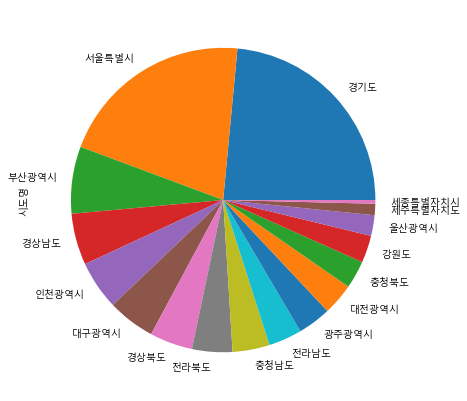

In [97]:
city_normalize.plot.pie(figsize=(7,7))

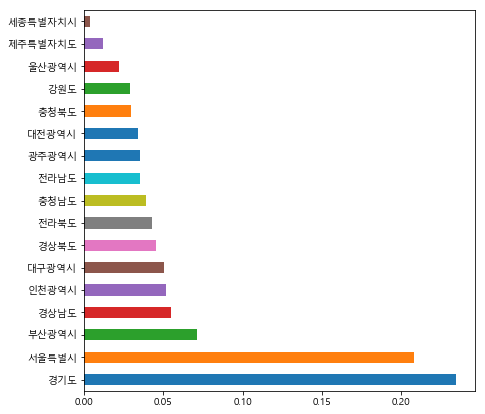

In [100]:
city_normalize.plot.barh(figsize=(7,7))

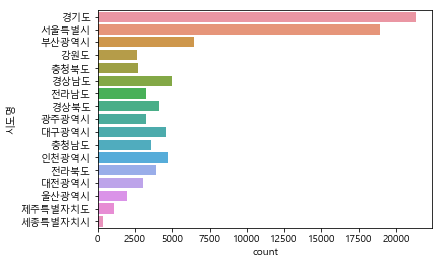

In [104]:
sns.countplot(data=df, y="시도명")

In [108]:
c= df["상권업종중분류명"].value_counts()
n= df["상권업종중분류명"].value_counts(normalize=True)

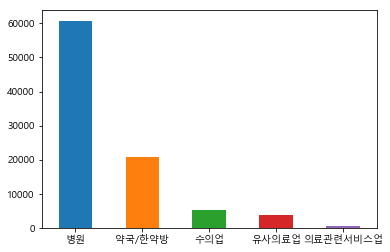

In [110]:
c.plot.bar(rot=0)

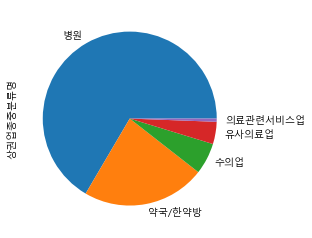

In [111]:
n.plot.pie()

In [115]:
c =df["상권업종소분류명"].value_counts()

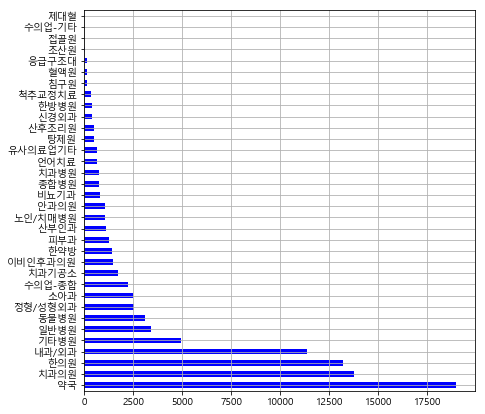

In [120]:
# barh = bar horizontal -> x,y축 바꿔서
c.plot.barh(figsize=(7,7), grid=True,color="blue")

In [123]:
df_medical=df[df["상권업종중분류명"]=="약국/한약방"].copy()

In [124]:
df.loc[df["상권업종대분류명"]=="의료","상권업종중분류명"]

0              병원
1              병원
2              병원
3              병원
4          약국/한약방
5             수의업
6          약국/한약방
7          약국/한약방
8              병원
9              병원
10         약국/한약방
11             병원
12            수의업
13         약국/한약방
14         약국/한약방
15         약국/한약방
16         약국/한약방
17             병원
18             병원
19             병원
20            수의업
21             병원
22          유사의료업
23            수의업
24         약국/한약방
25            수의업
26             병원
27             병원
28             병원
29             병원
           ...   
91305      약국/한약방
91306      약국/한약방
91307      약국/한약방
91308      약국/한약방
91309    의료관련서비스업
91310       유사의료업
91311       유사의료업
91312      약국/한약방
91313          병원
91314          병원
91315          병원
91316          병원
91317          병원
91318          병원
91319       유사의료업
91320          병원
91321      약국/한약방
91322      약국/한약방
91323          병원
91324      약국/한약방
91325          병원
91326          병원
91327       유사의료업
91328          병원
91329    의

In [128]:
df_medi=df[df["상권업종중분류명"]=="유사의료업"]

In [131]:
df_medi["상호명"].value_counts().head()

리원        32
고려수지침     22
대한적십자사    17
헌혈의집      12
수치과기공소    10
Name: 상호명, dtype: int64

In [138]:
n=df_medi["시군구명"].value_counts(normalize=True)
n.head()

서구    0.037796
중구    0.037530
남구    0.033804
북구    0.030077
동구    0.027149
Name: 시군구명, dtype: float64

In [181]:
df_hospital=df[(df["상권업종소분류명"]=="종합병원")&(df["시도명"]=="서울특별시")].copy()

In [182]:
# ~: 제외하고
df_hospital.loc[~df_hospital["상호명"].str.contains("종합병원"),"상호명"].unique()

array(['대진의료재단', '홍익병원별관', 'SNUH', '평화드림여의도성모병원의료기매장', '한양', '백산의료재단친구병원',
       '서울보훈병원', '서울성모병원장례식장꽃배달', '서울대학교병원', '알콜중독및정신질환상담소',
       '강남성모병원장례식장꽃배달', '제일병원', '이랜드클리닉', '사랑나눔의료재단', '우울증센터', '성심의료재단',
       '다나의료재단', '서울아산병원신관', '원자력병원장례식장', '국민의원', '고려대학교구로병원', '학교법인일송학원',
       '삼성의료원장례식장', '희명스포츠의학센터인공신장실', '연세대학교의과대학강남세브란스', '국립정신병원',
       '코아클리닉', '수서제일의원', '사랑의의원', '한국전력공사부속한일병원', '신촌연세병원', '창동제일의원',
       '영동세브란스병원', '제일성심의원', '삼성의료재단강북삼성태', '서울시립보라매병원', '서울이의원',
       '서울대학교병원비상계획외래', '평화드림서울성모병원의료', '홍익병원', '사랑나눔의료재단서', '독일의원',
       '서울연합의원', '우신향병원', '동부제일병원', '아산재단금강병원', '명곡안연구소', '아산재단서울중앙병원',
       '메디힐특수여객', '삼성생명공익재단삼성서', '성광의료재단차병원', '한국건강관리협회서울특',
       '정해복지부설한신메디피아', '성베드로병원', '성애의료재단', '실로암의원', 'Y&T성모마취과', '광진성모의원',
       '서울현대의원', '이노신경과의원', '송정훼밀리의원', '서울중앙의원', '영남의료재단', '인제대학교서울백병원',
       '한국필의료재단', '세브란스의원', '가톨릭대학교성바오로병원장례식장', '서울연세의원', '사랑의병원',
       '성삼의료재단미즈메디병원', '씨엠충무병원', '성신의원', '원진재단부설녹색병원', '송파제일의원',
       '카톨릭성모의원', '한양성심의원', '관악

In [183]:
df_hospital[df_hospital["상호명"].str.contains("꽃배달")]

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
2803,20895655,서울성모병원장례식장꽃배달,NaN,S,의료,S01,병원,S01B01,종합병원,Q86101,...,1165010700105510000017194,NaN,서울특별시 서초구 사평대로28길 55,137040.0,6578.0,1,1,NaN,127.000682,37.498257
4644,22020310,강남성모병원장례식장꽃배달,NaN,S,의료,S01,병원,S01B01,종합병원,Q86101,...,1165010700105470006016762,이이빌딩,서울특별시 서초구 반포대로39길 56-24,137040.0,6578.0,NaN,1,NaN,127.001756,37.499095


In [184]:
df_hospital[df_hospital["상호명"].str.contains("의료기")]

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
1917,23210677,평화드림여의도성모병원의료기매장,NaN,S,의료,S01,병원,S01B01,종합병원,Q86101,...,1156011000100620000031477,여의도성모병원,서울특별시 영등포구 63로 10,150713.0,7345.0,NaN,1,NaN,126.936693,37.518296


In [192]:
# list 형태로 만들기 --> tolist()
drop_row1=df_hospital[df_hospital["상호명"].str.contains("꽃배달|의료기|장례식장|어린이집|상담소")].index.tolist()
drop_row1

[1917, 2803, 4431, 4644, 7938, 10283, 47008, 60645, 70177]

In [193]:
drop_row2=df_hospital[df_hospital["상호명"].str.endswith("의원")].index.tolist()
drop_row2

[8479,
 12854,
 13715,
 14966,
 16091,
 18047,
 20200,
 20415,
 30706,
 32889,
 34459,
 34720,
 35696,
 37251,
 45120,
 49626,
 51575,
 55133,
 56320,
 56404,
 56688,
 57551,
 62113,
 76508]

In [194]:
drop_row=drop_row1+drop_row2
len(drop_row)

33

In [195]:
# axis=0 : 행(index)을 기준으로 드랍
df_hospital=df_hospital.drop(drop_row,axis=0)

In [196]:
df_hospital.shape

(58, 39)

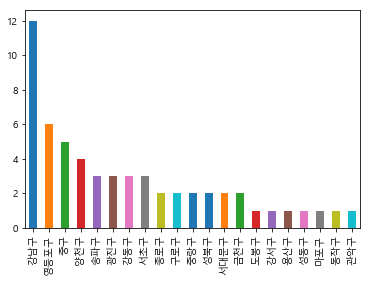

In [197]:
df_hospital["시군구명"].value_counts().plot.bar()

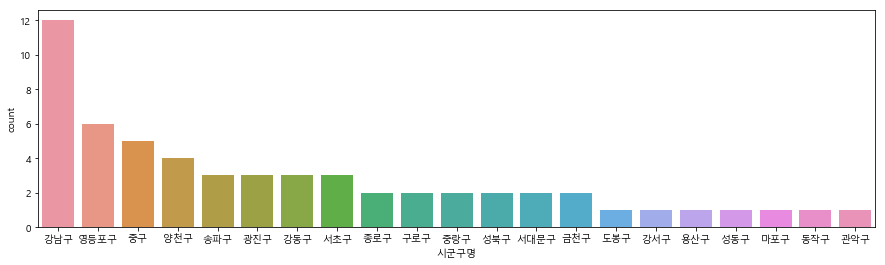

In [205]:
plt.figure(figsize=(15,4))
sns.countplot(data=df_hospital,x="시군구명",order=df_hospital["시군구명"].value_counts().index)

In [207]:
df_hospital["상호명"].unique()

array(['대진의료재단', '홍익병원별관', 'SNUH', '한양', '백산의료재단친구병원', '서울보훈병원',
       '서울대학교병원', '제일병원', '이랜드클리닉', '사랑나눔의료재단', '우울증센터', '성심의료재단',
       '다나의료재단', '서울아산병원신관', '고려대학교구로병원', '학교법인일송학원', '희명스포츠의학센터인공신장실',
       '연세대학교의과대학강남세브란스', '국립정신병원', '코아클리닉', '한국전력공사부속한일병원', '신촌연세병원',
       '영동세브란스병원', '삼성의료재단강북삼성태', '서울시립보라매병원', '서울대학교병원비상계획외래',
       '평화드림서울성모병원의료', '홍익병원', '사랑나눔의료재단서', '우신향병원', '동부제일병원', '아산재단금강병원',
       '명곡안연구소', '아산재단서울중앙병원', '메디힐특수여객', '삼성생명공익재단삼성서', '성광의료재단차병원',
       '한국건강관리협회서울특', '정해복지부설한신메디피아', '성베드로병원', '성애의료재단', 'Y&T성모마취과',
       '영남의료재단', '인제대학교서울백병원', '한국필의료재단', '사랑의병원', '성삼의료재단미즈메디병원',
       '씨엠충무병원', '원진재단부설녹색병원', '강남센트럴병원', '우리들병원', '건국대학교병원', '서울적십자병원',
       '서울성모병원응급의료센터', '가톨릭대학교여의도성모병원', '씨엠병원'], dtype=object)

In [208]:
df_seoul = df[df["시도명"]=="서울특별시"].copy()


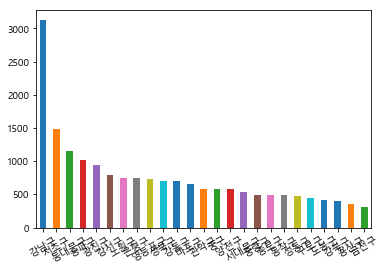

In [211]:
df_seoul["시군구명"].value_counts().plot.bar(rot=30)

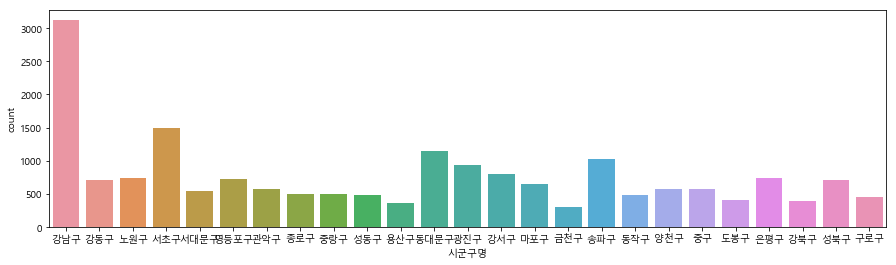

In [214]:
plt.figure(figsize=(15,4))
sns.countplot(data=df_seoul, x="시군구명")

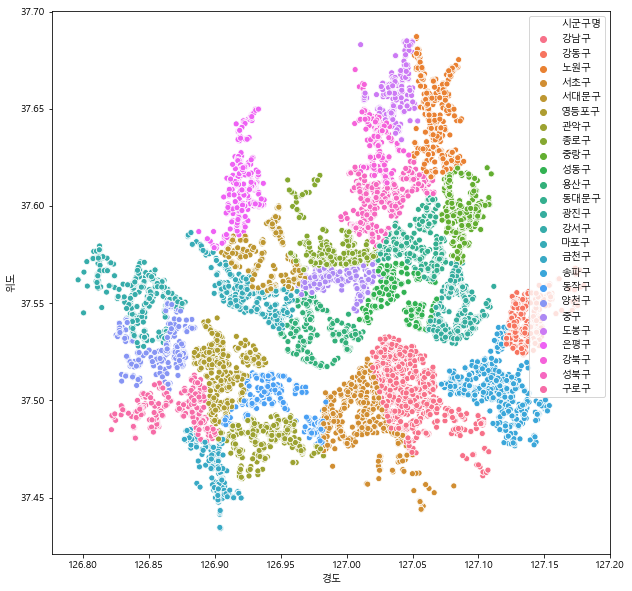

In [216]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=df_seoul,x="경도",y="위도",hue="시군구명")

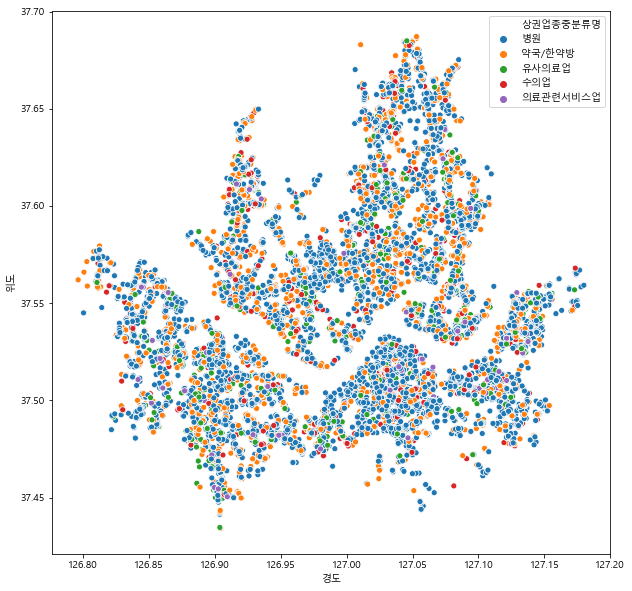

In [217]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=df_seoul,x="경도",y="위도",hue="상권업종중분류명")

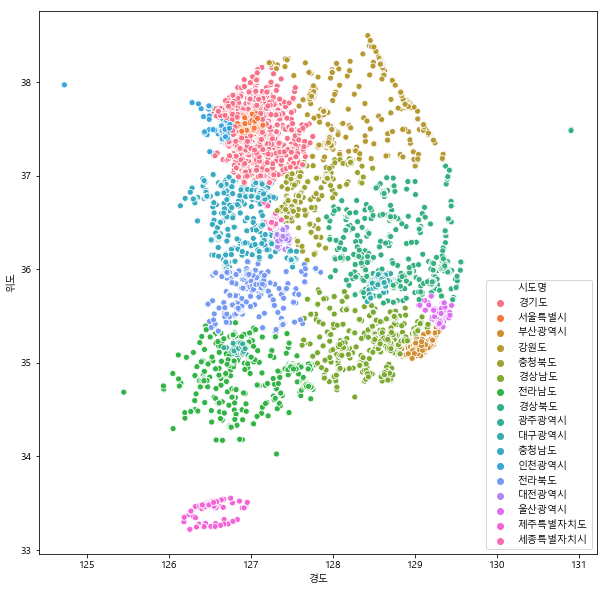

In [219]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=df,x="경도",y="위도",hue="시도명")

In [220]:
import folium

In [221]:
folium.Map()

In [227]:
lat=df_hospital["위도"].mean()
mag=df_hospital["경도"].mean()

In [231]:
map=folium.Map(location=[lat,mag],zoom_start=12)

for n in df_hospital.index:
    name=df_hospital.loc[n,"상호명"]
    address = df_hospital.loc[n,"도로명주소"]
    popup=f"{name}-{address}"
    location=[df_hospital.loc[n,"위도"],df_hospital.loc[n,"경도"]]
    folium.Marker(
        location = location,
        popup=popup).add_to(map)
map